In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime

Here, the data from the Nain tide gauge is loaded:

In [149]:
Nain_gauge = pd.read_csv('h833a.csv', parse_dates=True)
Nain_gauge.head()

,year,month,day,hour,height
0,1963,10,17,5,530
1,1963,10,17,6,650
2,1963,10,17,7,970
3,1963,10,17,8,1380
4,1963,10,17,9,1870


Here, the missing values are replaced with NaN:

In [110]:
Nain_gauge = Nain_gauge.replace(-32767, np.NaN)

The mean observed water level is calculated. That value is then subtracted from each observation of water level in the dataset:

In [111]:
demeaned = water_level - water_level.mean()
Nain_gauge['height_corr'] = demeaned

This is a list of index values that correspond to the beginning of a continuous year-long record of water level observations, and the row number of the measurement that occurs exactly one year later:

[(16896, 25656),
 (29856, 38616),
 (60984, 69744),
 (71352, 80112),
 (332821, 341581),
 (411838, 420598),
 (446492, 455252),
 (455663, 464423),
 (464424, 473184),
 (473185, 481945)]

Here, the first pair of index values is used to slice the Nain gauge DataFrame into a one-year long record:

In [124]:
year65 = Nain_gauge.loc[16896:29303, :].reset_index(drop=True)

That data is visualized:

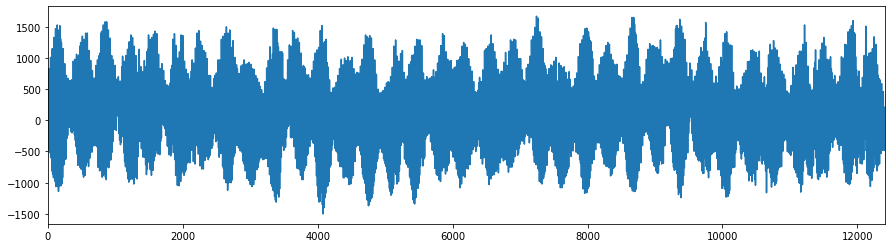

In [120]:
ax =  year65['height_corr'].plot(figsize=(15,4))

The first measurement in that record is defined as a datetime object called "t0":

In [150]:
t0 = datetime(year65.loc[0,'year'], year65.loc[0,'month'], year65.loc[0,'day'], year65.loc[0,'hour'])
t0

datetime.datetime(1965, 9, 20, 5, 0)

A one-year-long array of hours is generated:

In [130]:
hours = 0.1*np.arange(365 * 24)

An array of datetime objects, beginning at "t0" and of equal length to one-year's worth of hours, is generated:

In [131]:
times = Tide._times(t0, hours)
len(times)

8760

The tidal decomposition function from pytides is applied to the year of water level observations:

In [133]:
tide_65 = Tide.decompose(year65['height_corr'], times)

An array of water level over one year is generated for the data:

In [134]:
tide_model = tide_65.at(times)

The tidal model is plotted:

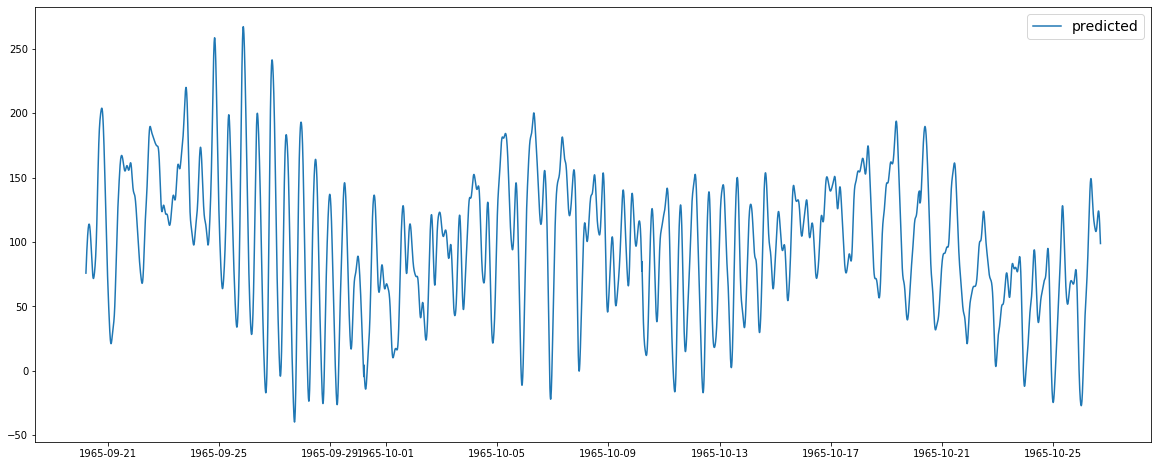

In [153]:
fig, ax = plt.subplots(figsize=(20,8))

# plot the model
ax.plot(times, tide_model, label='predicted')

ax.legend(fontsize=14)

plt.show()

The tidal consituents calculated by pytides are added to a new DataFrame:

In [155]:
constituent = [c.name for c in tide_65.model['constituent']]

In [156]:
year65_components = pd.DataFrame(tide_65.model, index=constituent).drop('constituent', axis=1)

The tidal amplitude is converted to meters and added to the DataFrame:

In [157]:
year65_components['amplitude (m)'] = year65_components['amplitude']/1000

The largest 10 tidal components are displayed:

In [158]:
year65_components.sort_values('amplitude', ascending=False).head(10)

,amplitude,phase,amplitude (m)
R2,3278.340810,42.935023,3.278341
T2,2772.807719,214.603181,2.772808
S1,2240.766477,26.629729,2.240766
K2,2118.460120,146.919828,2.118460
S2,1664.026702,310.667683,1.664027
P1,1205.990911,99.902275,1.205991
K1,1004.361142,305.939633,1.004361
lambda2,949.750087,83.092294,0.949750
L2,909.888662,50.374085,0.909889
N2,398.309667,113.432231,0.398310


In [159]:
year65_components.to_csv('ComponentsAmplitude_1965.csv')